In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# 데이터 전처리 과정 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# column_stack()은 전달 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결함. 연결할 리스트는 튜플로 전달함
# 튜플은 리스트랑 비슷하지만 수정할 수 없다. 튜플을 사용하여 함수에 값을 전달하면 전달한 값이 바뀌지 않는 다는 것을 믿을 수 있기 때문에 매개변수값으로 많이 쓰임  
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
from sklearn.model_selection import train_test_split

In [17]:
# train_test_split()는 샘플의 25%를 테스트 세트로 떼어냄
#stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠준다. 훈련데이터가 작거나 특정클래스의 샘플 개수가 적을때 유용함 
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [21]:
# 잘못된 예측을 하고 있는 모델 해결하기 
kn.predict([[25, 150]])

array([0.])

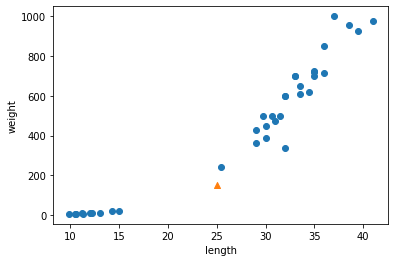

In [23]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
# k-최근접 이웃은 주변의 샘플 중에서 다수의 클래스를 예측으로 사용한다.
# KNeighborsClassifier() 클래스는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환하는 kneighbors() 메서드를 제공  
distances, indexes = kn.kneighbors([[25, 150]])

In [25]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [26]:
indexes

array([[21, 33, 19, 30,  1]])

Text(0, 0.5, 'weight')

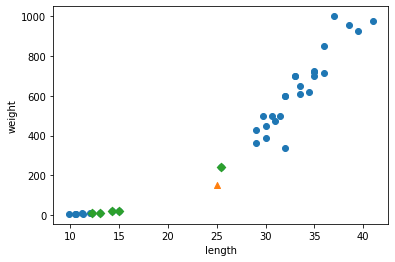

In [27]:
# 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보기 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [30]:
# 이웃 샘플은 4개가 빙어. 그래프를 그려보았을때는 도미와 가깝게 보이지만 실제로는 빙어와 가까운 값을 가지고 있다. 
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

In [31]:
# 이유는 거리의 기준이 다르기 때문. x축과 y축의 거리 비율이 다르다. 
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

Text(0, 0.5, 'weight')

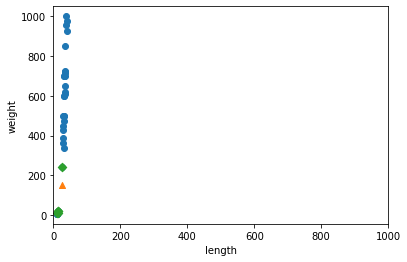

In [32]:
# x축의 범위를 y축과 동일하게 0~1000으로 변경하기 
# 데이터를 표현하는 기준이 다르면 알고리즘이 올바로 예측할 수 없다. 그렇기 때문에 특성값을 일정한 기준으로 맞춰줘야한다. 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')

In [33]:
# 가장 널리 사용되는 전처리 방법중 하나는 표준점수 (standard score) 혹은 z점수 
# 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져있는지를 나타내는데, 이를 통해 실제 크기와 상관없이 동일한 조건에서 비교할 수 있음
# 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음, 평균을 내어 구한다.
# 표준편차: 분산의 제곱근 (데이터가 분산된 정도를 나타낸다)
# 표준점수: 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값  

In [34]:
# 표준점수 구하기 : 평균을 빼고 표준편차를 나누기 
# 데이터의 각 특성마다 스케일이 다르기 때문에 평균과 표준편차를 각각 구해야함. 이를 위해 axis=0을 지정하는데, 이렇게 하면 행을 따라 각 열의 통계값을 계산함 
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [35]:
mean

array([ 27.29722222, 454.09722222])

In [36]:
std

array([  9.98244253, 323.29893931])

In [37]:
# 표준점수 변환하기 (넘파이의 브로드캐스팅 기능)
train_scaled = (train_input - mean) / std

In [38]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

Text(0, 0.5, 'weight')

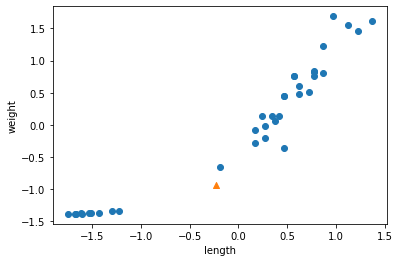

In [40]:
new_sample = ([25,150] - mean) / std 
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_sample[0], new_sample[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [41]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [42]:
# 테스트세트도 스케일을 맞춰주기 
test_scaled = (test_input - mean )  / std

In [43]:
kn.score(test_scaled, test_target)

1.0

In [45]:
kn.predict([new_sample])

array([1.])

Text(0, 0.5, 'weight')

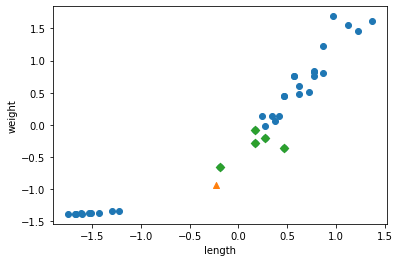

In [46]:
distances, indexes = kn.kneighbors([new_sample])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_sample[0], new_sample[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')